### Spectral Absorption Rate Viewer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from os import walk
from pathlib import Path


Define plotting functions

In [10]:
def plot_abs_rate(wl, spec_abs_rate_int, ax,star,hz,atmos,pigm, col):
    """Helper function to plot spectral absorption rate"""        
    ax.plot(wl, spec_abs_rate_int, c = col, lw = 1, label = pigm)
    ax.set_xlim(2500, 8500)
    #ax.set_ylim(0,4.5e-2)
    #ax.set_yscale('log')
    ax.axvline(x=5000, lw = 1, linestyle='--', color='grey', alpha=0.3)
    #ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useMathText = True, useOffset=False)
    ax.tick_params(axis = 'y', labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 10)

sampling = 25
from scipy.ndimage.filters import uniform_filter1d
def plot_abs_rate_M(wl, spec_abs_rate_int, ax,star,hz,atmos,pigm, col):
    """Helper function to plot spectral absorption rate"""        
    ax.plot(wl, uniform_filter1d(spec_abs_rate_int, size = sampling, axis = 0), c = col, lw = 1, label = pigm)
    ax.set_xlim(2500, 8500)
    ax.set_ylim(0,4.5)
    #ax.set_yscale('log')
    ax.axvline(x=5000, lw = 1, linestyle='--', color='grey', alpha=0.3)
    #ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useMathText = True, useOffset=False)
    ax.tick_params(axis = 'y', labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 10)
    
def plot_abs_rate_inset_M(wl, spec_abs_rate_int, ax, star,hz,atmos,pigm, col):
    """Helper function to plot spectral absorption rate"""        
    ax.plot(wl, uniform_filter1d(spec_abs_rate_int, size = sampling, axis = 0), c = col, lw = 1, label = pigm)
    ax.set_xlim(7100,8370)
    ax.autoscale(enable=True, axis='y', tight=True)
    ax.yaxis.set_ticklabels([])
    ax.tick_params(axis = 'x', labelsize = 8)
    
    
    

Define available cases to plot

In [11]:
pigm = ['ChlA', 'ChlB', 'BChlA', 'BChlB', 'phot0']
hz = ['hzi','hzm','hzo']
star_type = ['a5v','g2v','m8v']
atmos = ['os1','os2','os3','os4']

Spectral type and atmosphere

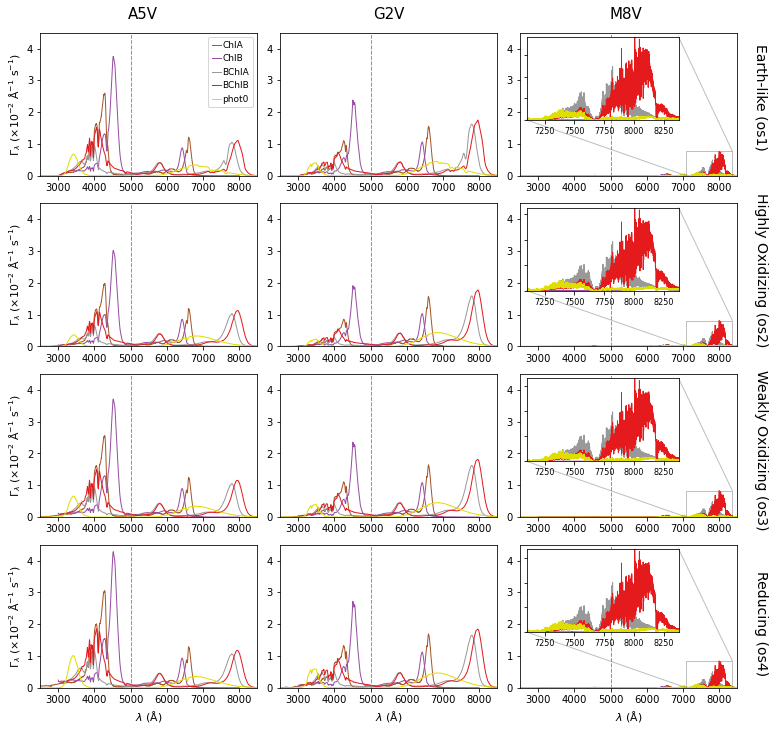

In [15]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# https://gist.github.com/thriveth/8560036
cols_list = ['#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

##### iterate through atmosphere and pigment file names:
r1 = range(len(atmos))
r2 = range(len(star_type))
r3 = range(len(pigm))

fig, ax = plt.subplots(len(atmos),len(star_type),figsize=(11,10))

for ii, jj, kk in itertools.product(r1,r2,r3): # this is a nested loop
    # select atmosphere and pigment file names
    file_name = 'output/atm_' + star_type[jj] + '_' + hz[1] + '_' + atmos[ii] + '_' + pigm[kk] + '.txt'
    spectra = np.loadtxt(file_name)    
               
    # plot spectra
    wl, F, T, sigma, Gamma_l = np.hsplit(spectra, spectra.shape[1])
  
    # rescale Gamma_l (to avoid exponents in scientific notation)
    Gamma_l = Gamma_l*100
    
    if jj != 2:
        plot_abs_rate(wl, Gamma_l, ax[ii,jj],star_type[jj],hz[1],atmos[ii],pigm[kk], cols_list[kk])
        ax[ii,jj].set_ylim(0,4.5)
    else:
        plot_abs_rate_M(wl, Gamma_l, ax[ii,jj],star_type[jj],hz[1],atmos[ii],pigm[kk], cols_list[kk])

    ax[ii,0].set_ylabel(r'$\Gamma_\lambda$ ($\times 10^{-2}$ $\mathrm{\AA}^{-1}$ s$^{-1}$)', fontsize = 11)
    ax[-1,jj].set_xlabel(r'$\lambda$ ($\mathrm{\AA}$)', fontsize = 11)
    
ax[0,0].legend(loc = 'upper right', fontsize = 9, handletextpad = 0.2, handlelength = 1)
    
# add insets
jj = 2
for ii in r1:
    axins = ax[ii,jj].inset_axes([0.03, 0.39, 0.7, 0.58])
    for kk in r3:
        # select atmosphere and pigment file names
        file_name = 'output/atm_' + star_type[jj] + '_' + hz[1] + '_' + atmos[ii] + '_' + pigm[kk] + '.txt'
        spectra = np.loadtxt(file_name)    
               
        # plot spectra
        wl, F, T, sigma, Gamma_l = np.hsplit(spectra, spectra.shape[1])
                
        # rescale Gamma_l (to avoid exponents in scientific notation)
        Gamma_l = Gamma_l*100
    
        plot_abs_rate_inset_M(wl, Gamma_l, axins,star_type[jj],hz[1],atmos[ii],pigm[kk], cols_list[kk])

    ax[ii,jj].indicate_inset_zoom(axins)
    
height = 0.985
width = 0.98

fig.text(0.20, height, 'A5V', horizontalalignment='center', verticalalignment='center', fontsize=15)
fig.text(0.51, height, 'G2V', horizontalalignment='center', verticalalignment='center', fontsize=15)
fig.text(0.81, height, 'M8V', horizontalalignment='center', verticalalignment='center', fontsize=15)

fig.text(width, 0.87, 'Earth-like (os1)', horizontalalignment='center', verticalalignment='center', fontsize=14, rotation=-90)
fig.text(width, 0.63, 'Highly Oxidizing (os2)', horizontalalignment='center', verticalalignment='center', fontsize=14, rotation=-90)
fig.text(width, 0.38, 'Weakly Oxidizing (os3)', horizontalalignment='center', verticalalignment='center', fontsize=14, rotation=-90)
fig.text(width, 0.14, 'Reducing (os4)', horizontalalignment='center', verticalalignment='center', fontsize=14, rotation=-90)


plt.tight_layout()
plt.subplots_adjust(left=0.07, bottom=0.05, right=0.95, top=0.96)
plt.savefig('spectral_overlap_vs_spectral_type_and_atmosphere_hzm_PNAS_v4.pdf')
plt.show()  